#Ensemble: RandomForest & Boosting

Avalia a performance da classificação da base de dados sonar com os métodos de combinação de classificadores.

Este notebook foi desenvolvido para o ambiente GOOGLE COLAB ([colab.research.google.com](https://colab.research.google.com)).

Prof. Hugo de Paula

-------------------------------------------------------------------------------

### Base de dados: Sonar, Mines vs. Rocks

https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+%28Sonar,+Mines+vs.+Rocks%29

208 instâncias

60 atributos

2 classes (rocha, mina)


In [ ]:
!pip install dtreeviz

In [13]:
!pip install pydotplus

In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder



### Carga de dados

90% da base para treinamento (187 registros)

10% da base para teste (21 regisros)

In [2]:
from google.colab import drive
drive.mount('/content/drive')
sonar = pd.read_excel('/content/drive/My Drive/PUC/ML/Datasets/sonar.xlsx', sheet_name=0)



Mounted at /content/drive


In [7]:
X = sonar.iloc[:,0:(sonar.shape[1] - 1)]

le = LabelEncoder()
y = le.fit_transform(sonar.iloc[:,(sonar.shape[1] - 1)])

class_names = le.classes_
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)


### Árvore de decisão tradicional

In [8]:

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Classificador Árvore de Decisão:\n")
print("--------------------------------------")
print("Acurácia da base de treinamento: {:.2f}".format(clf.score(X_train, y_train)))
print("--------------------------------------")

print(classification_report(y_test, y_pred, target_names=class_names))

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=class_names, columns=[x + "(prev)" for x in class_names])
print(cnf_table)


Classificador Árvore de Decisão:

--------------------------------------
Acurácia da base de treinamento: 1.00
--------------------------------------
              precision    recall  f1-score   support

        Mina       0.79      0.85      0.81        13
       Rocha       0.71      0.62      0.67         8

    accuracy                           0.76        21
   macro avg       0.75      0.74      0.74        21
weighted avg       0.76      0.76      0.76        21

       Mina(prev)  Rocha(prev)
Mina           11            2
Rocha           3            5


### Random Forest e Extra Trees

Número de estimadores: 10

In [17]:
# Random forest com 10 arvores

clr = RandomForestClassifier(n_estimators=10)
clr = clr.fit(X_train, y_train)
y_pred = clr.predict(X_test)


print("Classificador Random Forest:\n RandomForestClassifier(n_estimators=10)\n")
print("--------------------------------------")
print("Acurácia da base de treinamento: {:.2f}".format(clr.score(X_train, y_train)))
print("--------------------------------------")

print(classification_report(y_test, y_pred, target_names=class_names))

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=class_names, columns=[x + "(prev)" for x in class_names])
print(cnf_table)


Classificador Random Forest:
 RandomForestClassifier(n_estimators=10)

--------------------------------------
Acurácia da base de treinamento: 1.00
--------------------------------------
              precision    recall  f1-score   support

        Mina       1.00      1.00      1.00        13
       Rocha       1.00      1.00      1.00         8

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

       Mina(prev)  Rocha(prev)
Mina           13            0
Rocha           0            8


In [10]:
print(clr.estimators_)

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1747062298, splitter='best'), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1776379078, splitter='best'), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=

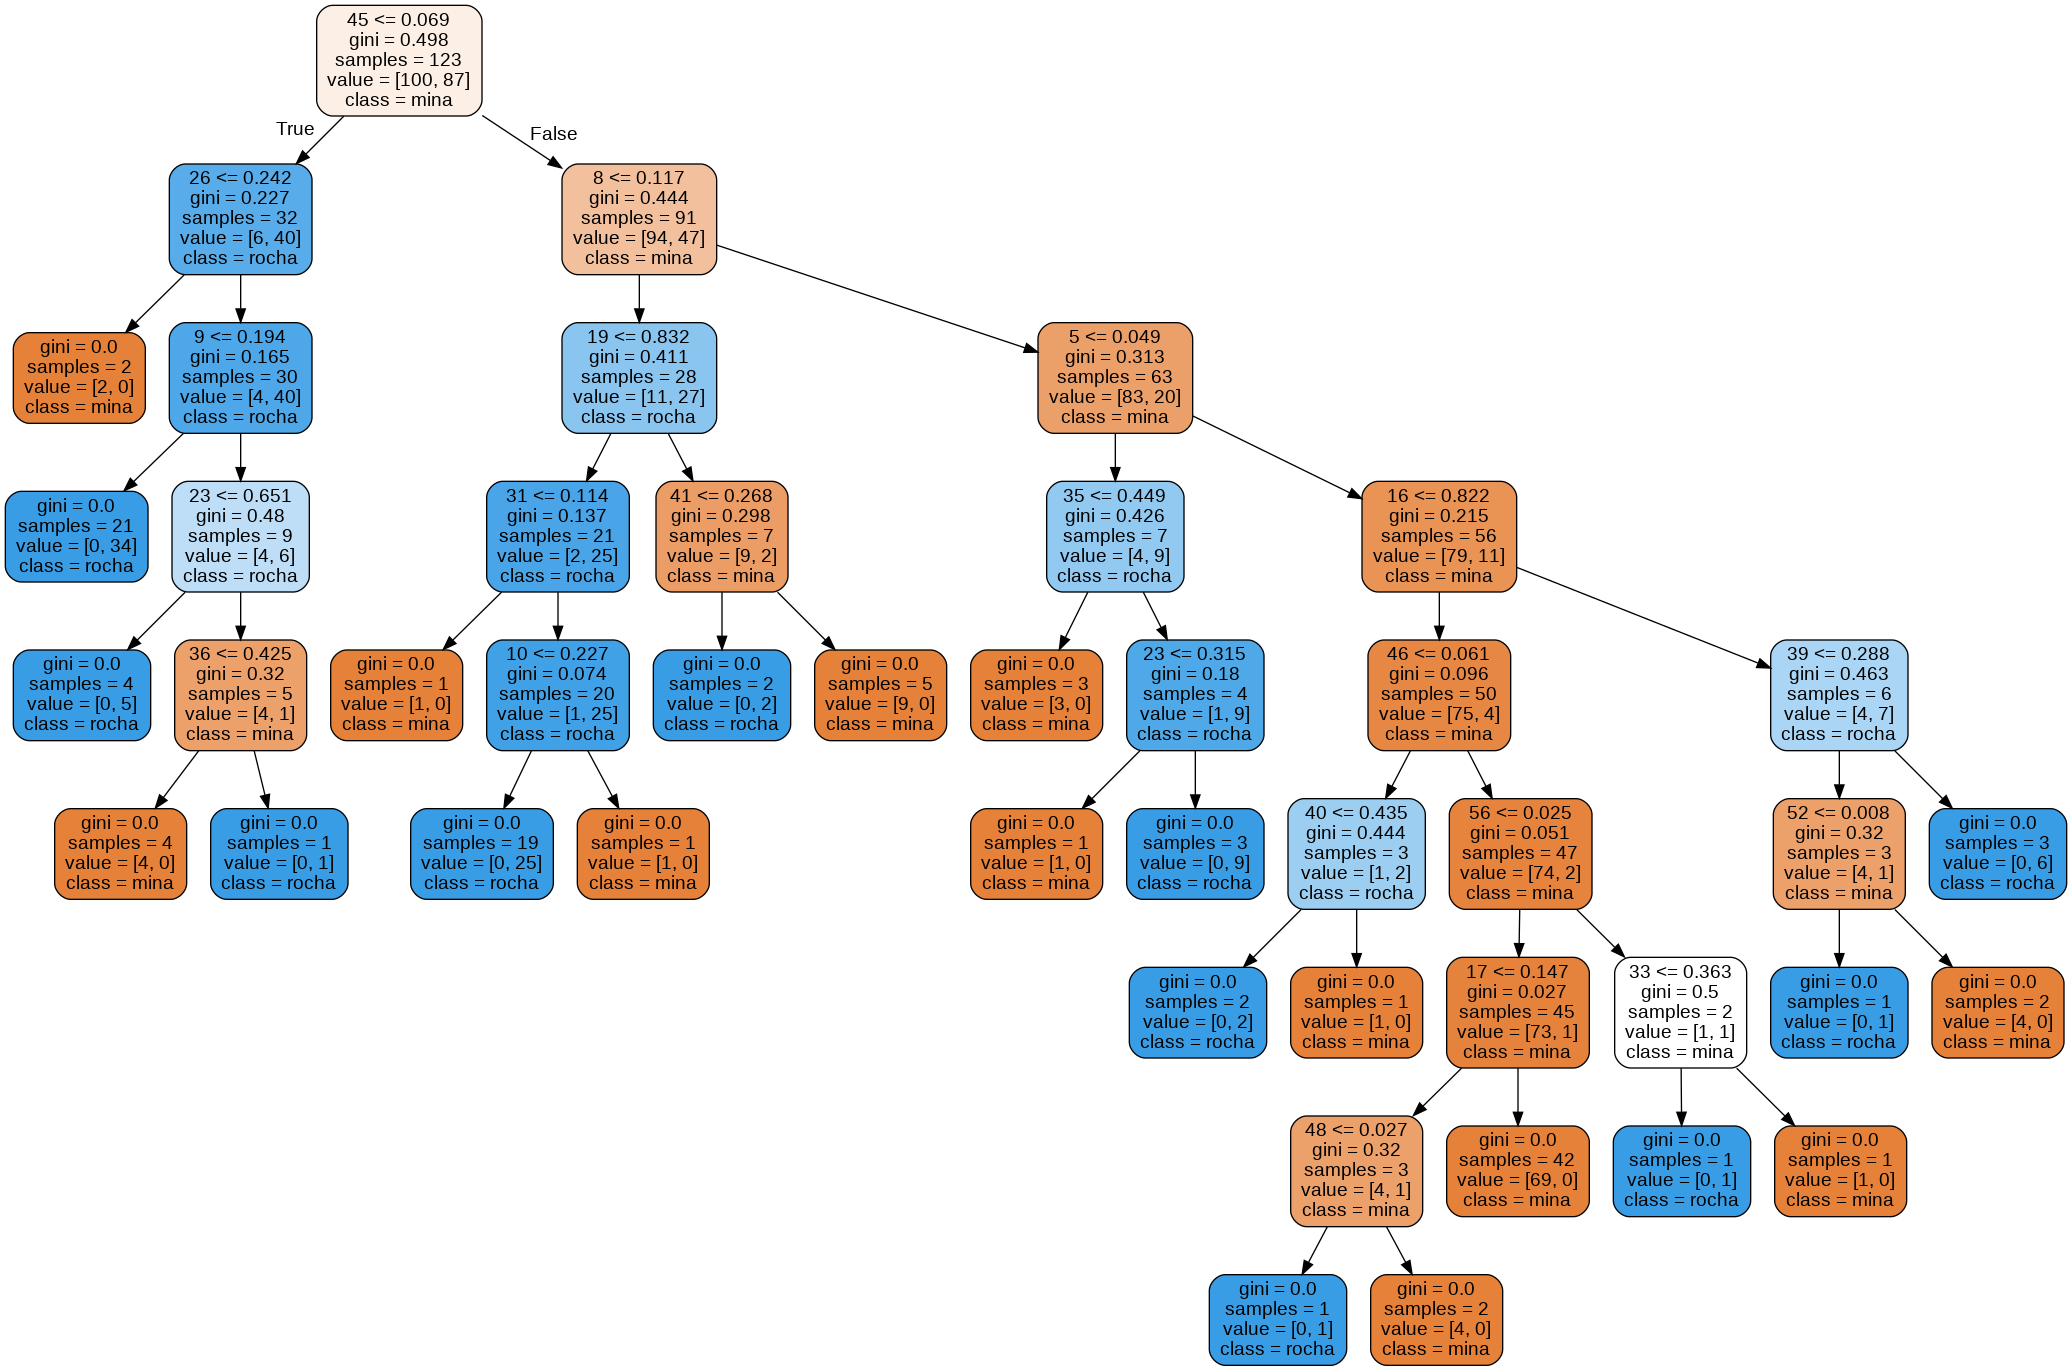

In [14]:
import pydotplus
from IPython.display import Image

# Create DOT data
dot_data = tree.export_graphviz(clr.estimators_[0], out_file=None, 
                                proportion=False,
                                rounded =True,
                                filled=True,
                                feature_names=np.arange(0,60),  
                                class_names=["mina", "rocha"])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())


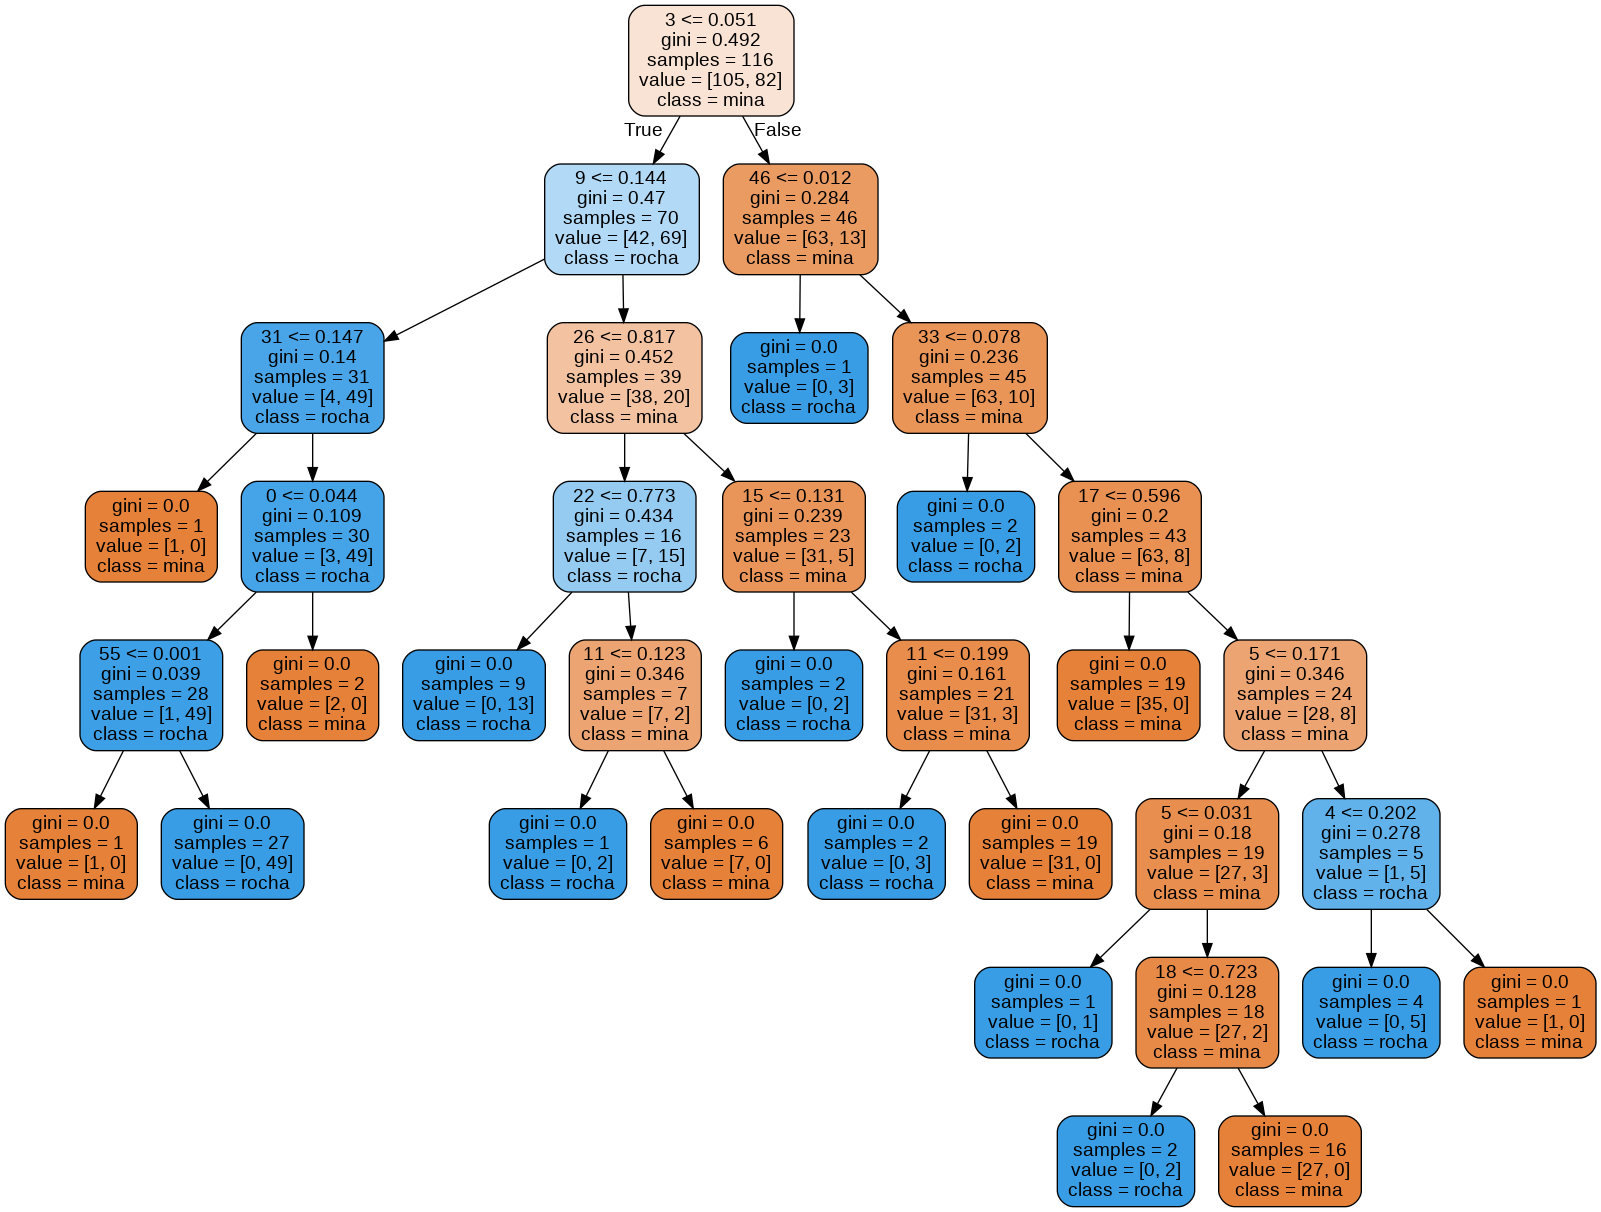

In [15]:

# Create DOT data
dot_data = tree.export_graphviz(clr.estimators_[1], out_file=None, 
                                proportion=False,
                                rounded =True,
                                filled=True,
                                feature_names=np.arange(0,60),  
                                class_names=["mina", "rocha"])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())


In [21]:
# Random forest com heurísticas extremas

cle = ExtraTreesClassifier(n_estimators=10)
cle = cle.fit(X_train, y_train)
y_pred = cle.predict(X_test)

print("Classificador Extreme Tree:\n ExtraTreesClassifier(n_estimators=10)\n")
print("--------------------------------------")
print("Acurácia da base de treinamento: {:.2f}".format(cle.score(X_train, y_train)))
print("--------------------------------------")

print(classification_report(y_test, y_pred, target_names=class_names))

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=class_names, columns=[x + "(prev)" for x in class_names])
print(cnf_table)


Classificador Extreme Tree:
 ExtraTreesClassifier(n_estimators=10)

--------------------------------------
Acurácia da base de treinamento: 1.00
--------------------------------------
              precision    recall  f1-score   support

        Mina       1.00      0.92      0.96        13
       Rocha       0.89      1.00      0.94         8

    accuracy                           0.95        21
   macro avg       0.94      0.96      0.95        21
weighted avg       0.96      0.95      0.95        21

       Mina(prev)  Rocha(prev)
Mina           12            1
Rocha           0            8


### AdaBoost

Estimador: DecisionTreeClassifier

Número de estimadores: 10.

Perceba o overfitting na base de treinamento.


In [40]:
# Adaboost com árvores mínimas
ada = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=1), 
                         algorithm="SAMME", n_estimators=10)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
print("Classificador AdaBoost:\n AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=1), algorithm=\"SAMME\", n_estimators=10)\n")
print("--------------------------------------")
print("Acurácia da base de treinamento: {:.2f}".format(ada.score(X_train, y_train)))
print("--------------------------------------")

print(classification_report(y_test, y_pred, target_names=class_names))

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=class_names, columns=[x + "(prev)" for x in class_names])
print(cnf_table)

Classificador AdaBoost:
 AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=10)

--------------------------------------
Acurácia da base de treinamento: 1.00
--------------------------------------
              precision    recall  f1-score   support

        Mina       0.90      0.69      0.78        13
       Rocha       0.64      0.88      0.74         8

    accuracy                           0.76        21
   macro avg       0.77      0.78      0.76        21
weighted avg       0.80      0.76      0.77        21

       Mina(prev)  Rocha(prev)
Mina            9            4
Rocha           1            7


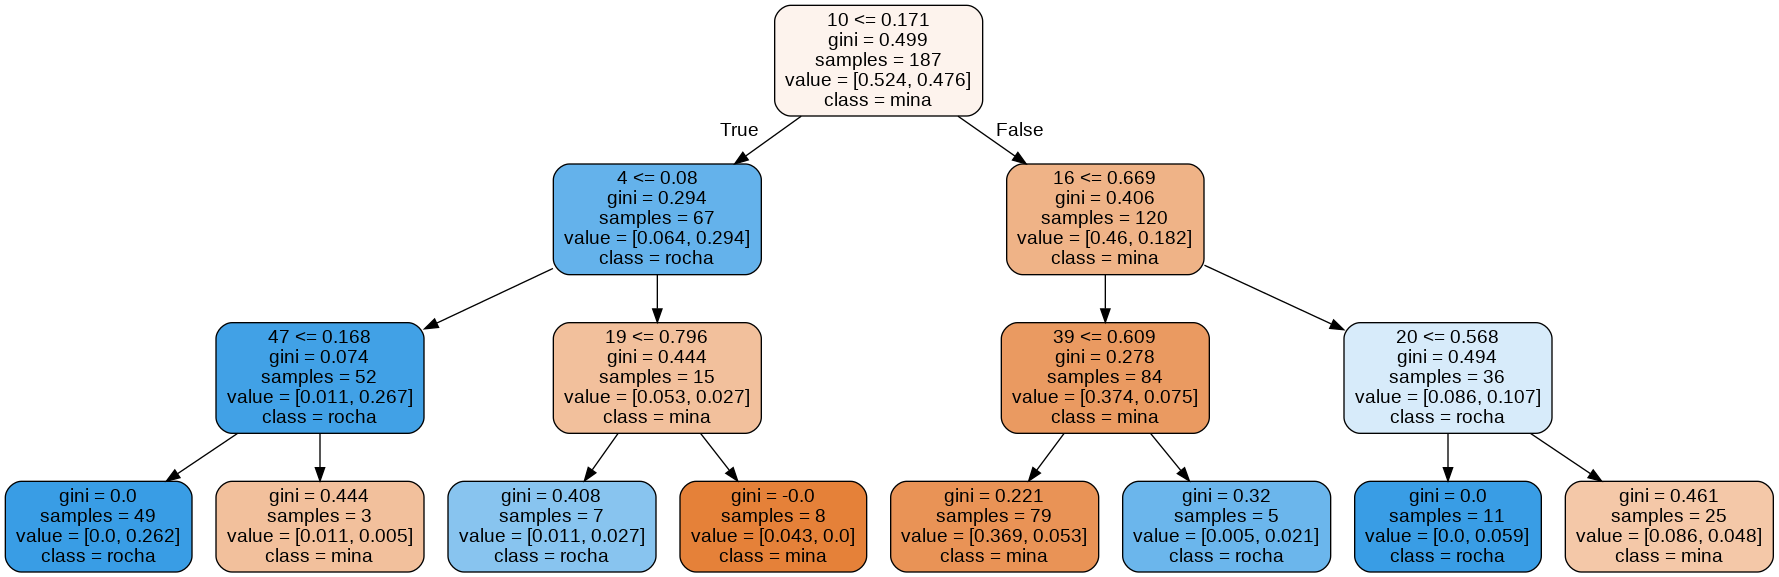

In [41]:
# Create DOT data
dot_data = tree.export_graphviz(ada.estimators_[0], out_file=None, 
                                proportion=False,
                                rounded =True,
                                filled=True,
                                feature_names=np.arange(0,60),  
                                class_names=["mina", "rocha"])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [48]:
from sklearn.svm import SVC
# Adaboost com SVC
ada = AdaBoostClassifier(SVC(kernel='rbf'), algorithm="SAMME", n_estimators=50)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
print("Classificador AdaBoost:\n AdaBoostClassifier(SVC(kernel='rbf'), algorithm=\"SAMME\", n_estimators=10)\n")
print("--------------------------------------")
print("Acurácia da base de treinamento: {:.2f}".format(ada.score(X_train, y_train)))
print("--------------------------------------")

print(classification_report(y_test, y_pred, target_names=class_names))

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=class_names, columns=[x + "(prev)" for x in class_names])
print(cnf_table)

Classificador AdaBoost:
 AdaBoostClassifier(SVC(kernel='rbf'), algorithm="SAMME", n_estimators=10)

--------------------------------------
Acurácia da base de treinamento: 0.52
--------------------------------------
              precision    recall  f1-score   support

        Mina       0.62      1.00      0.76        13
       Rocha       0.00      0.00      0.00         8

    accuracy                           0.62        21
   macro avg       0.31      0.50      0.38        21
weighted avg       0.38      0.62      0.47        21

       Mina(prev)  Rocha(prev)
Mina           13            0
Rocha           8            0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
